In [1]:
import numpy as np
import librosa 
#import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from python_speech_features import mfcc , logfbank

In [2]:
os.chdir(r"C:\Users\Manan")

In [3]:
os.listdir('./accentdb_core\data')

['bangla', 'malayalam', 'odiya', 'telugu']

In [4]:
#LOADING DATASET:
os.listdir(path='./accentdb_core\data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './accentdb_core\data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

6183

In [ ]:
#RUN THIS BLOCK ONLY IF DOING MANUAL PROCESS DONT RUN ALWAYS
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

the birds cannot slid on the smooth planks
glue the sheet to the dark blue background
it's easy to tell the depth of a well
these days a chicken leg is a rare dish
rice is often served in round bowls
the juice of lemons makes fine punch


In [1]:
#FILTERS TO DATA SET SEE WETHER WANT TO APPLY OR NOT LATER WORK

def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


'\ndef envelope(y , rate, threshold):\n    mask=[]\n    y=pd.Series(y).apply(np.abs)\n    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()\n    for mean in y_mean:\n        if mean>threshold:\n            mask.append(True)\n        else:\n            mask.append(False)\n    return mask\n'

In [70]:
#FILTERS TO DATA SET SEE WETHER WANT TO APPLY OR NOT LATER WORK

import noisereduce as nr
 load data
rate, data = wavfile.read("mywav.wav")
 select section of data that is noise
noisy_part = data[10000:15000]
 perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)


C:\Users\manan\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: too many values to unpack (expected 2)

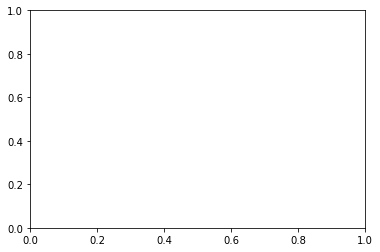

In [10]:
'''
import librosa as lr
from scipy.io import wavfile
from scipy import signal
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    #PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()
''''''

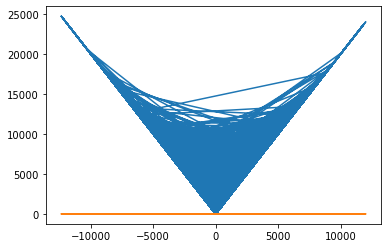

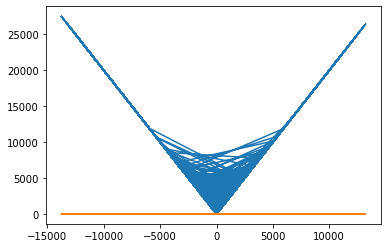

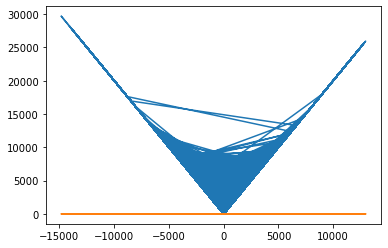

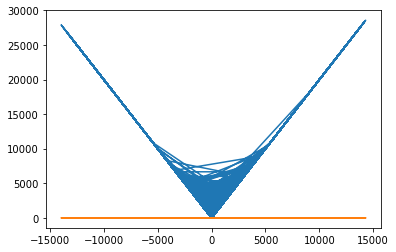

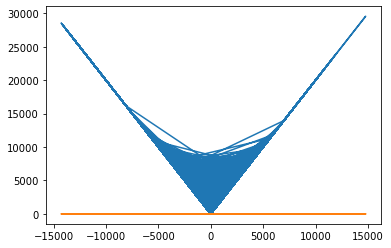

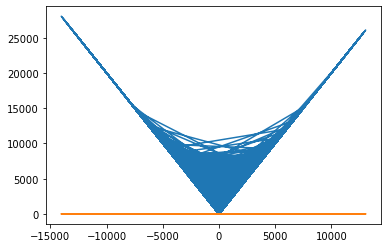

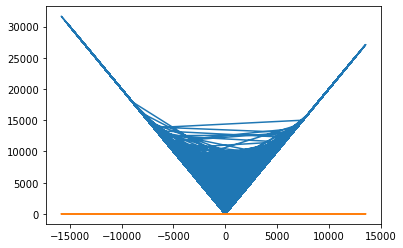

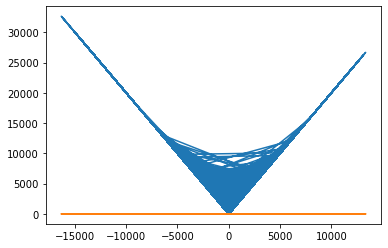

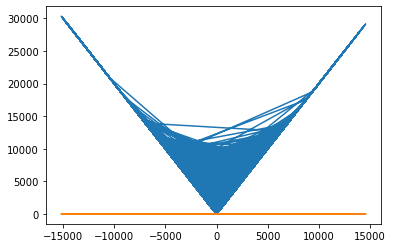

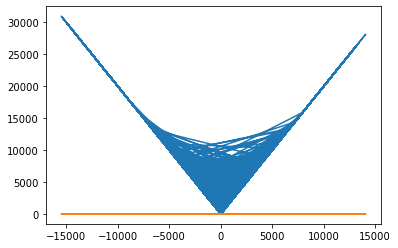

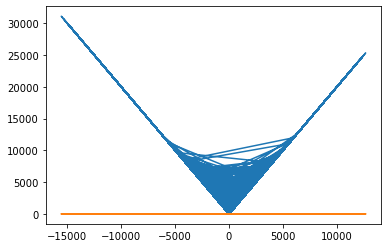

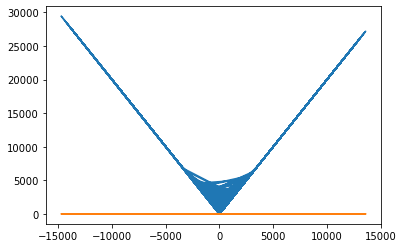

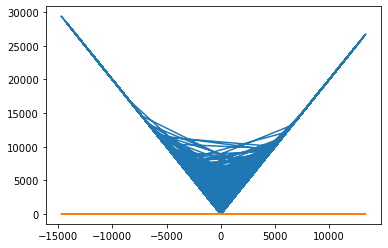

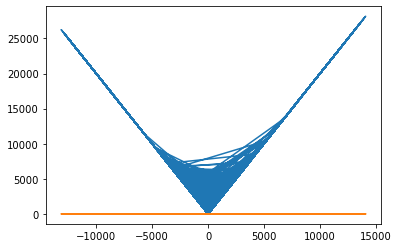

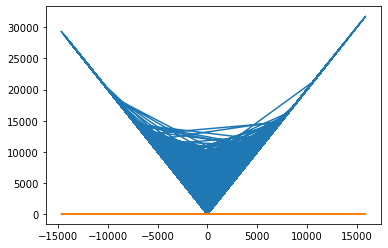

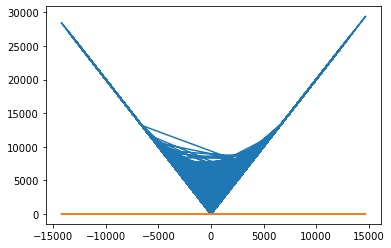

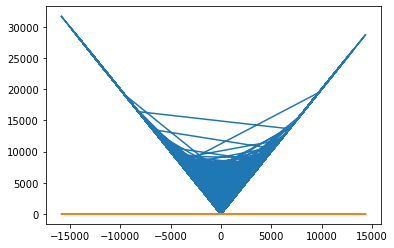

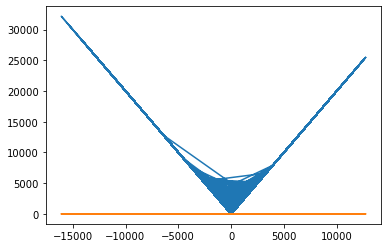

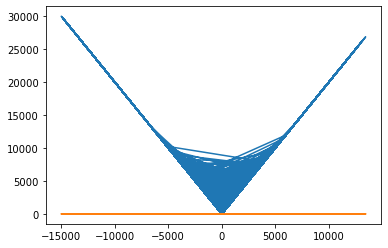

KeyboardInterrupt: 

In [11]:
'''
#RUN THIS BLOCK ONLY IF DOING MANUAL PROCESS DONT RUN ALWAYS
#NEED SOME FILTERING FOR DATASET(MANUAL VIUSALIZATION)
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()
'''

In [10]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [11]:
#languages in the dataset to be classified Audio Files based on...remove for FINAL SHOWING
#languages={
#  'bangla':'1',
#  'malayalam':'2',
#  'odiya':'3',
#  'telugu':'4',
#  'others':'5' 
#}


#inportant
#These are the emotions User wants to observe more :
observed_language=['bangla', 'malayalam', 'odiya', 'telugu']

In [73]:
#testing part done to check code parts remove for FINAL SHOWING
#import os,glob
#for file in glob.glob('./accentdb_core/data/*/*/bangla_s01_000.wav'):
#    file_name=os.path.basename(file)
#    t=file_name.split("_")[0]
#    print(t)
#    if t not in observed_language:
#        continue
#    print("hello1")
#print("hello")

In [12]:
#load data and extract feature of each sound
def load_data(test_size=0.2):
    x,y=[],[]
    answer = 0
    for file in glob.glob('./accentdb_core/data/*/*/*.wav'):
        file_name=os.path.basename(file)
        language=file_name.split("_")[0]
        
        if language not in observed_language:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(language)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [ ]:
# Split the dataset for MLP
import time
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [76]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(4637, 1546)
Features extracted: 180


In [77]:
#Initialize the Multi Layer Perceptron Classifier with adam stability default epsilon
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(150,150), learning_rate='adaptive', max_iter=500)

In [ ]:
# Train the model
model.fit(x_train,y_train)

In [79]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [80]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.94%


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      bangla       1.00      1.00      1.00       357
   malayalam       1.00      1.00      1.00       599
       odiya       1.00      1.00      1.00       194
      telugu       1.00      1.00      1.00       396

    accuracy                           1.00      1546
   macro avg       1.00      1.00      1.00      1546
weighted avg       1.00      1.00      1.00      1546



In [82]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[357   0   0   0]
 [  0 599   0   0]
 [  0   0 194   0]
 [  0   1   0 395]]
